| título | projeto | versão | data | autores | status |
| :--- | :--- | :--- | :--- | :--- | :--- |
| CRISP-DM — Fase 2: Data Understanding | Projeção da Taxa de Congestionamento — Justiça Estadual (GO) | 1.3 | 14-11-2025 | Júlio César e Lays de Freitas | Concluído |

Esse Notebook contém a **Análise Exploratória dos Dados (EDA)**.

### BIBLIOTECAS

In [98]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import glob

### CONFIGURAÇÕES, CARREGAMENTO E FORMATO DO DATASET

In [99]:
# Configurações Iniciais
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# 1) Carregar e concatenar os dados dos processos judiciais da pasta uploads
# Listar os arquivos CSV na pasta 'uploads'
arquivos_csv = glob.glob('uploads/processos_*.csv')

# Carregar os arquivos CSV e concatenar em um único DataFrame
dfs = []
for arquivo in arquivos_csv:
    
    df_temp = pd.read_csv(arquivo, sep=',', encoding='utf-8')
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

print("\n=== Arquivo carregado com sucesso! ===")
print("Dimensões (linhas, colunas):", df.shape)

# Guardar uma cópia de trabalho
df_cp = df.copy()


=== Arquivo carregado com sucesso! ===
Dimensões (linhas, colunas): (3245632, 10)


### DICIONÁRIO DE DADOS
 
>- `processos`: Número (id) dos processos judiciais
>- `data_distribuicao`: Data de entrada do processo judicial
>- `data_baixa`: Data de baixa do processo judicial
>- `entrancia`: Classificação das comarcas (*INICIAL, INTERMEDIÁRIA, FINAL*)
>- `comarca`: A comarca é a área geográfica onde um juiz de primeiro ou de segundo de grau exerce sua jurisdição, podendo abranger um ou mais municípios.
>- `serventia`: órgão ou local onde os serviços judiciais ou extrajudiciais são realizados, como cartórios (*serventia extrajudicial*) ou varas (*serventia judicial*)
>- `nome_area_acao`: Refere-se a uma área de especialização dentro do Poder Judiciário (*como Varas Cíveis, Varas Criminais, Varas de Família, Juizados Especiais, etc.*)
>- `is_segredo_justica`: Tipo do processo se tramita em segredo de justiça ou não
>- `codg_classe`: Código da classe
>- `codg_assuntos`: Código do assunto



### TIPOS DOS ATRIBUTOS

In [100]:
print("\n=== Tipos de dados das colunas ===\n")
df_cp.dtypes


=== Tipos de dados das colunas ===



processo               object
data_distribuicao      object
data_baixa             object
entrancia              object
comarca                object
serventia              object
nome_area_acao         object
is_segredo_justica       bool
codg_classe           float64
codg_assuntos          object
dtype: object

### AMOSTRA DE DADOS

In [101]:
df_cp.sample(10)

,processo,data_distribuicao,data_baixa,entrancia,comarca,serventia,nome_area_acao,is_segredo_justica,codg_classe,codg_assuntos
3029858,5569958.72.2025.8.09.0051,2025-07-18,NaN,FINAL,GOIÂNIA,16ª Vara Cível e Ambiental,upj civel,False,7.0,10422
382759,5401591.15.2022.8.09.0076,2022-07-07,2023-10-27,INTERMEDIÁRIA,IPORÁ,"2ª Vara (Cível, Criminal - crime em geral, cri...",fazenda publica mista,False,7.0,11946
316487,5333122.83.2022.8.09.0150,2022-06-06,2022-06-13,INTERMEDIÁRIA,TRINDADE,Juizado Especial Cível e Criminal,juizado especial civel,False,436.0,11782
493886,5517073.86.2022.8.09.0051,2022-08-25,2024-02-05,FINAL,GOIÂNIA,1ª Vara da Faz. Púb. Mun. e de Reg. Púb. - Exe...,upj fazenda publica municipal - execucao fiscal,False,1116.0,5952
1454154,5730324.83.2023.8.09.0139,2023-11-01,NaN,INTERMEDIÁRIA,RUBIATABA,"2ª Vara Judicial (Fazendas Públicas, Criminal,...",fazenda publica mista,False,7.0,6104
204081,5215922.61.2022.8.09.0051,2022-04-13,NaN,FINAL,GOIÂNIA,Gabinete da Central de Cumprimento de Sentença...,upj civel,False,156.0,9587
1553635,5836257.14.2023.8.09.0117,2023-12-13,NaN,INTERMEDIÁRIA,PALMEIRAS DE GOIÁS,Vara Judicial,civel,False,12154.0,4960
1271347,5539144.86.2023.8.09.0006,2023-08-17,2025-05-29,FINAL,ANÁPOLIS,2ª Vara de Família e Sucessões,upj familia interior,True,12246.0,11785
1827259,5267684.06.2024.8.09.0162,2024-04-09,2024-11-27,INTERMEDIÁRIA,VALPARAÍSO DE GOIÁS,2ª Vara Criminal (crimes em geral),criminal,False,279.0,3402
2525876,5035906.44.2025.8.09.0169,2025-01-20,NaN,INTERMEDIÁRIA,ÁGUAS LINDAS DE GOIÁS,Juizado Especial Cível e Criminal,juizado especial civel,False,436.0,14175


### VALORES NULOS

In [102]:
print("\n=== Total de valores nulos por coluna ===\n")
totalNulos = (df_cp.isnull()).sum()
print(totalNulos)


=== Total de valores nulos por coluna ===

processo                    0
data_distribuicao           0
data_baixa            1022011
entrancia                   0
comarca                     0
serventia                   0
nome_area_acao              0
is_segredo_justica          0
codg_classe                 3
codg_assuntos               0
dtype: int64


In [103]:
# Percentual de Nulos
print("\n=== Percentual de valores nulos por coluna ===\n")
percentualNulos = (totalNulos/len(df_cp))*100
print(percentualNulos)


=== Percentual de valores nulos por coluna ===

processo               0.000000
data_distribuicao      0.000000
data_baixa            31.488813
entrancia              0.000000
comarca                0.000000
serventia              0.000000
nome_area_acao         0.000000
is_segredo_justica     0.000000
codg_classe            0.000092
codg_assuntos          0.000000
dtype: float64


O atributo `data_baixa` apresenta o maior percentual de valores nulos no dataset, o que é esperado e justificável: a ausência de data indica que os processos correspondentes ainda não foram concluídos ou baixados, permanecendo em andamento.

### DESCRIÇÃO ESTATÍSTICA

In [104]:
df_cp.describe()

,codg_classe
count,3.245629e+06
mean,3.417819e+03
std,5.332938e+03
min,7.000000e+00
25%,1.560000e+02
50%,3.070000e+02
75%,1.093300e+04
max,1.562000e+04


Como o método `describe()` opera exclusivamente com atributos numéricos, e a única coluna numérica presente no dataset é `cod_classe` (que funciona como identificador), esta análise preliminar mostra-se insuficiente para uma compreensão estatística abrangente do dataframe. Para obter insights estatísticos relevantes ao problema em questão, será necessário realizar transformações e criar features numéricas.

In [105]:
# Análise de colunas datetime, incluindo data mínima e máxima. Não leva em consideração as datas nulas.

df_temp = df_cp.copy()

df_temp['data_distribuicao'] = pd.to_datetime(df_temp['data_distribuicao'], errors='coerce')
df_temp['data_baixa'] = pd.to_datetime(df_temp['data_baixa'], errors='coerce')

print("\n=== Estatísticas descritivas das colunas datetime ===\n")
display(df_temp.describe(include=['datetime']))


=== Estatísticas descritivas das colunas datetime ===



,data_distribuicao,data_baixa
count,3245632,2223621
mean,2023-12-27 09:00:52.841479168,2024-06-07 11:24:20.516699136
min,2022-01-01 00:00:00,2022-01-07 00:00:00
25%,2023-02-01 00:00:00,2023-09-27 00:00:00
50%,2024-01-17 00:00:00,2024-07-26 00:00:00
75%,2024-12-04 00:00:00,2025-04-04 00:00:00
max,2025-10-01 00:00:00,2025-10-01 00:00:00


In [106]:
# Quais as 10 áreas de ação mais comuns?
print("\n=== Quais as 10 áreas de ação mais comuns? ===\n")
display(df_temp['nome_area_acao'].value_counts(normalize=True).head(10))


=== Quais as 10 áreas de ação mais comuns? ===



nome_area_acao
juizado especial civel               0.109431
upj civel                            0.103201
civel                                0.091065
criminal                             0.085901
upj dos juizados especiais civeis    0.074568
fazenda publica mista                0.067964
camara civel                         0.055641
familia - interior                   0.054076
upj criminal                         0.035721
preprocessual                        0.028251
Name: proportion, dtype: float64

In [107]:
# Quais as áreas de ação existentes?

print("\n=== Total de áreas de ação distintas:", df_temp['nome_area_acao'].nunique(), "===\n")
print("=== Áreas de ação existentes: ===\n")
print(df_temp['nome_area_acao'].value_counts())


=== Total de áreas de ação distintas: 45 ===

=== Áreas de ação existentes: ===

nome_area_acao
juizado especial civel                             355174
upj civel                                          334954
civel                                              295564
criminal                                           278803
upj dos juizados especiais civeis                  242021
fazenda publica mista                              220587
camara civel                                       180590
familia - interior                                 175512
upj criminal                                       115936
preprocessual                                       91691
juizado especial criminal                           86404
upj juizado especial da fazenda publica             85555
upj familia interior                                80952
juizado especial fazenda publica                    75216
fazenda publica municipal - execucao fiscal         63010
upj familia                      

In [108]:
# Qual a proporção de processos que são segredo de justiça?
print("\n=== Proporção de processos que são segredo de justiça ===\n")
print(df_temp['is_segredo_justica'].value_counts(normalize=True))


=== Proporção de processos que são segredo de justiça ===

is_segredo_justica
False    0.837649
True     0.162351
Name: proportion, dtype: float64


Aqui acima podemos perceber que a maioria dos processos existentes nos datasets desses anos não estão em segredo de justiça.

In [109]:
print("\n=== Total de comarcas distintas:", df_temp['comarca'].nunique(), "===\n")
print("\n=== Quais as 10 comarcas mais comuns? ===\n")
print(df_temp['comarca'].value_counts(normalize=True).head(10))


=== Total de comarcas distintas: 119 ===


=== Quais as 10 comarcas mais comuns? ===

comarca
GOIÂNIA                 0.265367
TRIBUNAL DE JUSTIÇA     0.075038
APARECIDA DE GOIÂNIA    0.064756
ANÁPOLIS                0.059974
RIO VERDE               0.028496
LUZIÂNIA                0.022737
ITUMBIARA               0.019695
CALDAS NOVAS            0.018920
TRINDADE                0.018163
SENADOR CANEDO          0.018030
Name: proportion, dtype: float64


In [110]:
print("\n=== Total de serventias distintas:", df_temp['serventia'].nunique(), "===\n")
print("\n=== Quais as 10 serventias mais comuns? ===\n")
print(df_temp['serventia'].value_counts(normalize=True).head(10))


=== Total de serventias distintas: 340 ===


=== Quais as 10 serventias mais comuns? ===

serventia
Vara Judicial                                                                                   0.100343
Juizado Especial Cível e Criminal                                                               0.052954
1ª Vara Judicial (Família e Sucessões, Infância e Juventude, Cível e Juizado Especial Cível)    0.031838
2ª Vara Judicial (Fazendas Públicas, Criminal, Execução Penal e Juizado Criminal)               0.029078
1ª Vara Cível                                                                                   0.013726
2ª Vara Cível                                                                                   0.013714
3º Juizado Especial Cível                                                                       0.013408
1º Juizado Especial Cível                                                                       0.013394
2º Juizado Especial Cível                                  

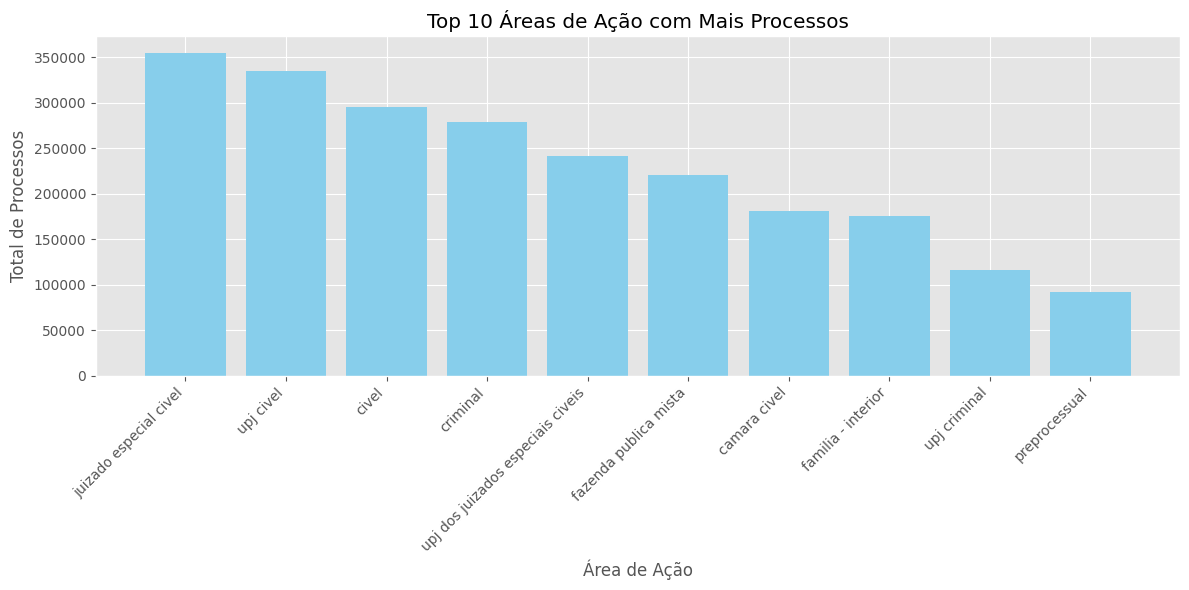

In [111]:
agrupado_area_acao = df_temp.groupby('nome_area_acao').size().reset_index(name='total_processos')
agrupado_area_acao = agrupado_area_acao.sort_values(by='total_processos', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(agrupado_area_acao['nome_area_acao'].head(10), agrupado_area_acao['total_processos'].head(10), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Áreas de Ação com Mais Processos')
plt.xlabel('Área de Ação')
plt.ylabel('Total de Processos')
plt.tight_layout()
plt.show()

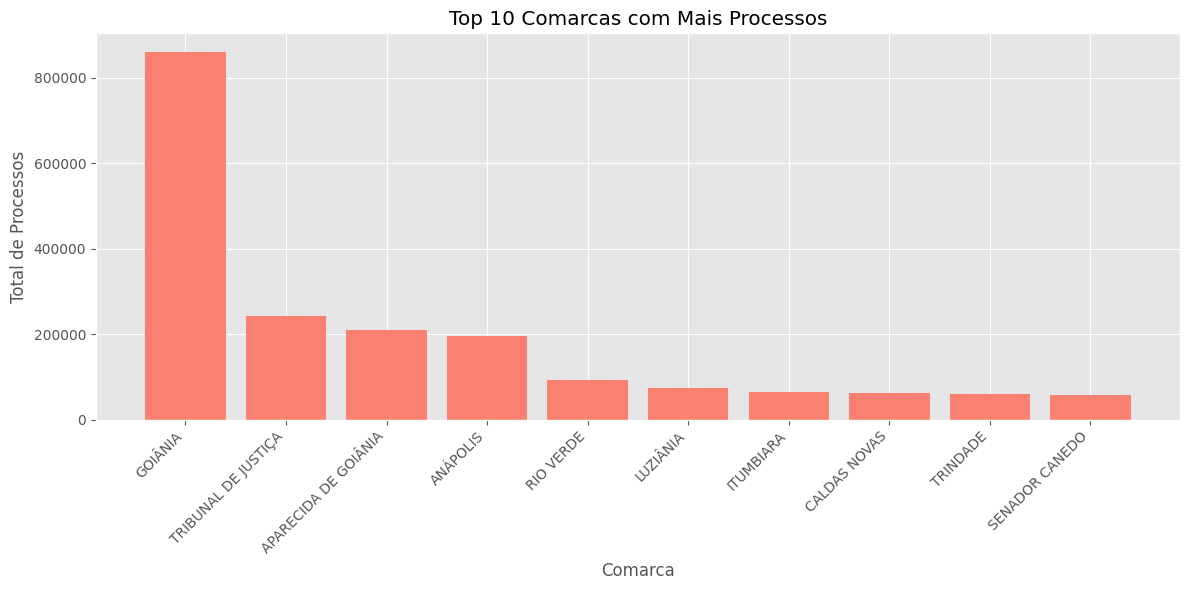

In [112]:
agrupado_comarca = df_temp.groupby('comarca').size().reset_index(name='total_processos')
agrupado_comarca = agrupado_comarca.sort_values(by='total_processos', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(agrupado_comarca['comarca'].head(10), agrupado_comarca['total_processos'].head(10), color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Comarcas com Mais Processos')
plt.xlabel('Comarca')
plt.ylabel('Total de Processos')
plt.tight_layout()
plt.show()